In [2]:
from matplotlib import pyplot as plt
import cv2
import numpy as np

In [3]:
def plot_image(image_1, image_2,title_1="Orignal", title_2="New Image"):
    plt.figure(figsize=(10,10))
    plt.subplot(1, 2, 1)
    plt.imshow(image_1,cmap="gray")
    plt.title(title_1)
    plt.subplot(1, 2, 2)
    plt.imshow(image_2,cmap="gray")
    plt.title(title_2)
    plt.show()

## Histogram

A histogram counts the number of occurrences of the intensity values of pixels, and it's a useful tool for understanding and manipulating images. We use cv.calcHist() to generate the histogram. Here are the parameter values:

cv2.calcHist(CV array:[image] this is the image channel:[0],for this course it will always be [None],the number of bins:[L],the range of index of bins:[0,L-1]) 

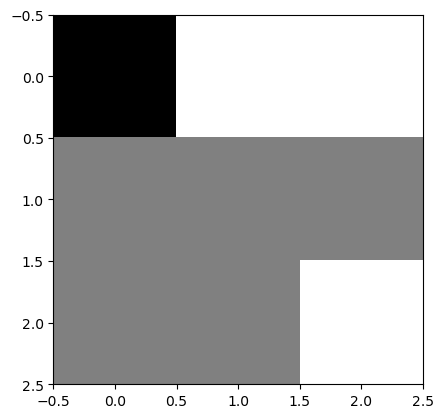

toy image: [[0 2 2]
 [1 1 1]
 [1 1 2]]


In [12]:
toy_image = np.array([[0,2,2],[1,1,1],[1,1,2]], dtype=np.uint8)
plt.imshow(toy_image, cmap="gray")
plt.show()
print("toy image:", toy_image)

<BarContainer object of 6 artists>

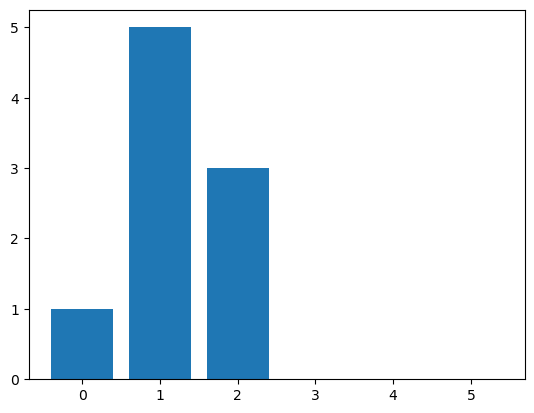

In [25]:
plt.bar([x for x in range(6)], [1,5,3,0,0,0])

In [18]:
hist=cv2.calcHist([toy_image],[0],None, [5], [0,5])

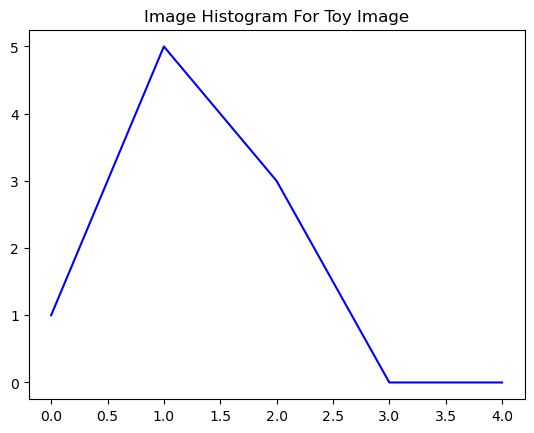

In [20]:
plt.plot(hist, color='b')
plt.title('Image Histogram For Toy Image')
plt.show()

## Gray Scale Histogram

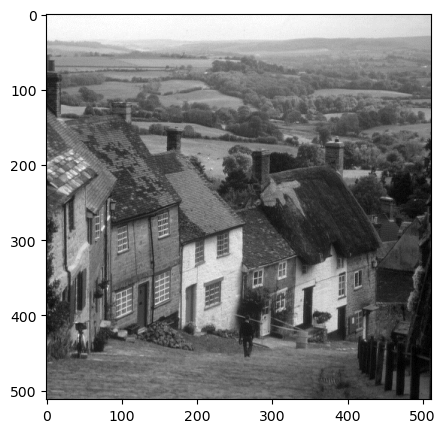

In [38]:
goldhill = cv2.imread("goldhill.bmp",0)
plt.figure(figsize=(5,5))
plt.imshow(goldhill, cmap="gray")
plt.show()

In [44]:
hist = cv2.calcHist([goldhill], [0], None, [256], [0, 256])

In [45]:
hist.shape

(256, 1)

In [46]:
hist[:,0]

array([    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,   564.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,  3696.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,  4730.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,  8990.,     0.,     0.,     0.,
           0.,     0.,     0.,     0., 12883.,     0.,     0.,     0.,
           0.,     0.,     0.,     0., 13356.,     0.,     0.,     0.,
           0.,     0.,     0.,     0., 14592.,     0.,     0.,     0.,
           0.,     0.,     0.,     0., 15688.,     0.,     0.,     0.,
           0.,     0.,     0.,     0., 15632.,     0.,     0.,     0.,
           0.,     0.,     0.,     0., 16169.,     0.,     0.,     0.,
           0.,     0.,     0.,     0., 17621.,     0.,     0.,     0.,
           0.,     0.,     0.,     0., 19310.,     0.,     0.,     0.,
      

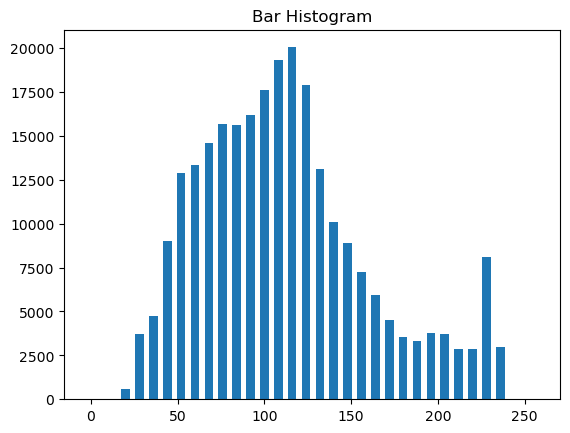

In [47]:
intensity_values = np.array([x for x in range(hist.shape[0])])
plt.bar(intensity_values, hist[:,0], width=5)
plt.title("Bar Histogram")
plt.show()

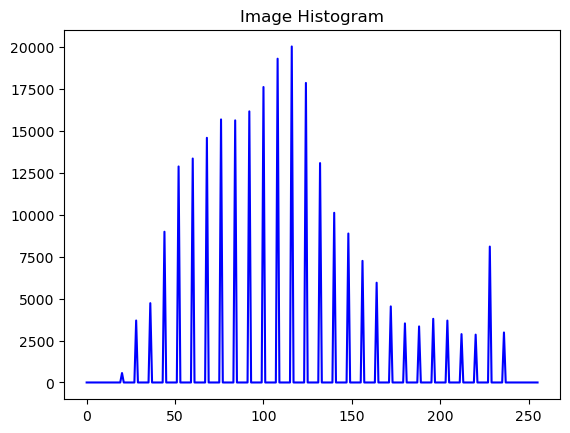

In [48]:
plt.plot(hist, color='b')
plt.title('Image Histogram')
plt.show()

In [52]:
PMF = hist / (goldhill.shape[0] * goldhill.shape[1])
print(PMF[:,0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.00215149 0.         0.         0.
 0.         0.         0.         0.         0.01409912 0.
 0.         0.         0.         0.         0.         0.
 0.01804352 0.         0.         0.         0.         0.
 0.         0.         0.03429413 0.         0.         0.
 0.         0.         0.         0.         0.04914474 0.
 0.         0.         0.         0.         0.         0.
 0.0509491  0.         0.         0.         0.         0.
 0.         0.         0.05566406 0.         0.         0.
 0.         0.         0.         0.         0.05984497 0.
 0.         0.         0.         0.         0.         0.
 0.05963135 0.         0.         0.         0.         0.
 0.         0.         0.06167984 0.         0.         0.
 0.         0.         0.         0.         0.06721878 

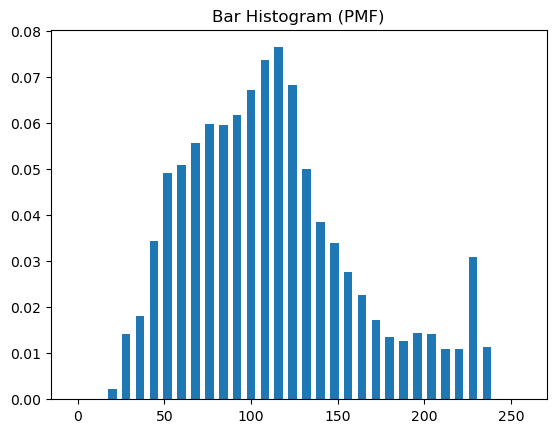

In [56]:
plt.bar(intensity_values,PMF[:,0], width=5)
plt.title("Bar Histogram (PMF)")
plt.show()

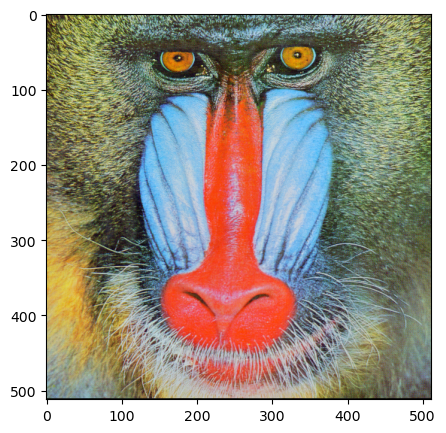

In [61]:
baboon = cv2.imread("baboon.png")
plt.figure(figsize=(5,5))
plt.imshow(cv2.cvtColor(baboon, cv2.COLOR_BGR2RGB))
plt.show()

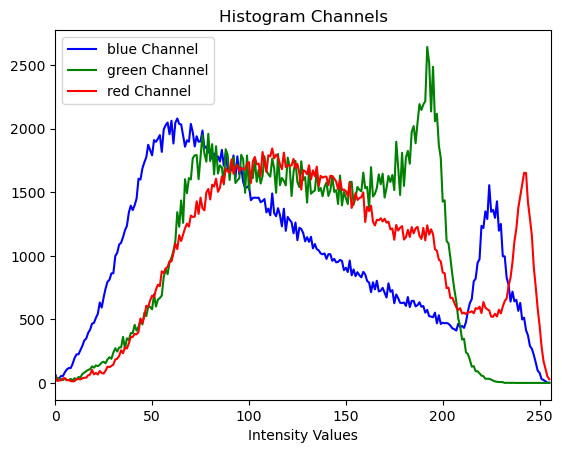

In [66]:
color = ('blue', 'green', 'red')
for i,col in enumerate(color):
    histr = cv2.calcHist([baboon], [i], None, [256], [0,256])
    plt.plot(intensity_values, histr[:,0], color=col, label=col+" Channel")
    plt.xlim([0,256])
    plt.xlabel("Intensity Values")

plt.legend()
plt.title("Histogram Channels")
plt.show()

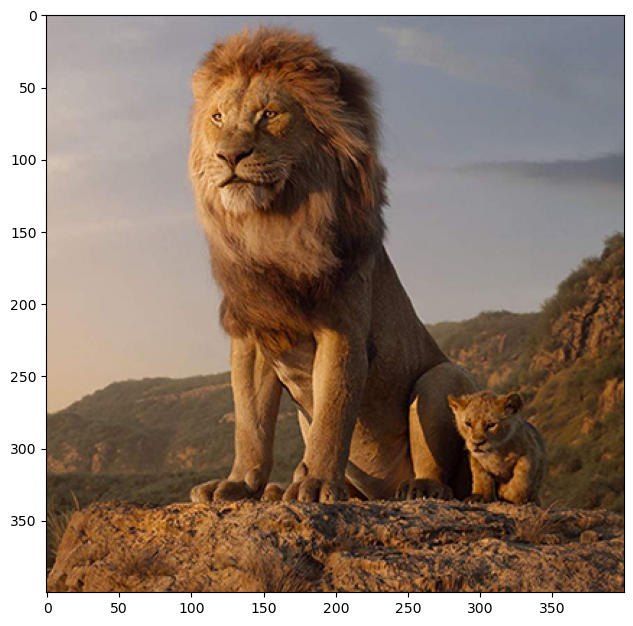

In [100]:
simba = cv2.imread("simba.jpg")
plt.figure(figsize=(7.5,7.5))
plt.imshow(cv2.cvtColor(simba, cv2.COLOR_BGR2RGB))
plt.show()

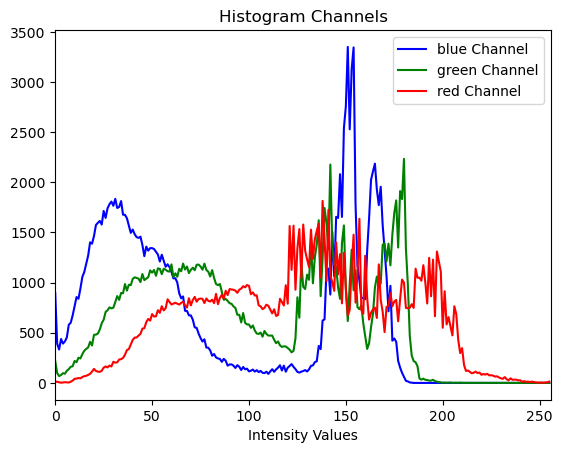

In [101]:
color = ('blue', 'green', 'red')
for i,col in enumerate(color):
    histr = cv2.calcHist([simba], [i], None, [256], [0,256])
    plt.plot(intensity_values, histr[:,0], color=col, label=col+" Channel")
    plt.xlim([0,256])
    plt.xlabel("Intensity Values")

plt.legend()
plt.title("Histogram Channels")
plt.show()

### Intensity Transformations
It's helpful to think of an image as a function  𝑓(𝑥,𝑦)
  instead of an array at this point, where x is the row index and y is the column index. You can apply a transformation  𝑇
  to the image and get a new image:
𝑔(𝑥,𝑦)=𝑇(𝑓(𝑥,𝑦))
 
An Intensity Transformation depends on only one single point  (𝑥,𝑦). For example, you can apply a linear transform  𝑔(𝑥,𝑦)=2𝑓(𝑥,𝑦)+1; this will multiply each image pixel by two and add one.

As the Intensity transforms only depend on one value; as a result, it is sometimes referred to as a gray-level mapping. The variable if  𝑟
  is the gray level intensity, similar to the histogram values. The new output s is given by:
𝑠=𝑇(𝑟)
 

### Image Negatives
Consider an image with  𝐿 intensity values ranging from  [0,𝐿−1]. We can reverse the intensity levels by applying the following:
𝑔(𝑥,𝑦)=𝐿−1−𝑓(𝑥,𝑦)

Using the intensity transformation function notation
𝑠=𝐿−1−𝑟
 
This is called the image negative. For  𝐿=256 the formulas simplifys to:
𝑔(𝑥,𝑦)=255−𝑓(𝑥,𝑦) and =255−𝑟


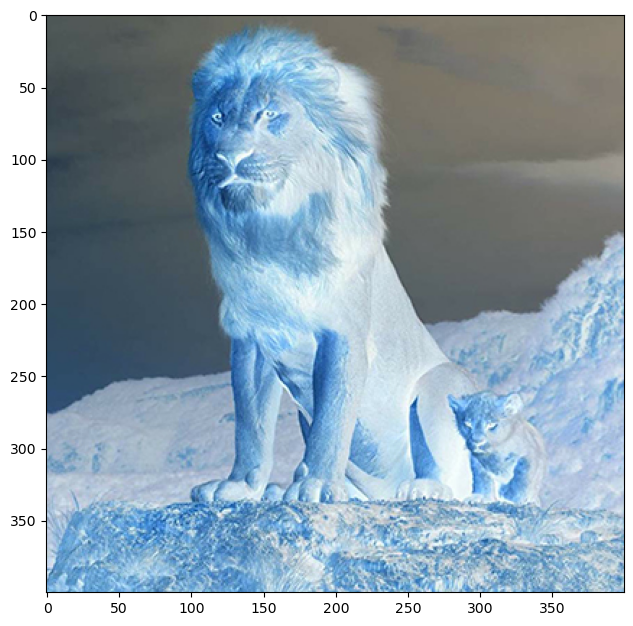

In [102]:
new_simba=simba.copy()
for x in range(3):
    new_simba[:,:,x] = -1*simba[:,:,x] + 255
plt.figure(figsize=(7.5,7.5))
plt.imshow(cv2.cvtColor(new_simba, cv2.COLOR_BGR2RGB))
plt.show()

## Thresholding

In [116]:
def thresholding_col(input_img,threshold,max_value=255, min_value=0):
    N,M,d=input_img.shape
    image_out=np.zeros((N,M,d),dtype=np.uint8)    
    for i  in range(N):
        for j in range(M):
            for k in range(d):
                if input_img[i,j,k]> threshold:
                    image_out[i,j,k]=max_value
                else:
                    image_out[i,j,k]=input_img[i,j,k]
    return image_out     


In [117]:
simba.shape

(400, 400, 3)

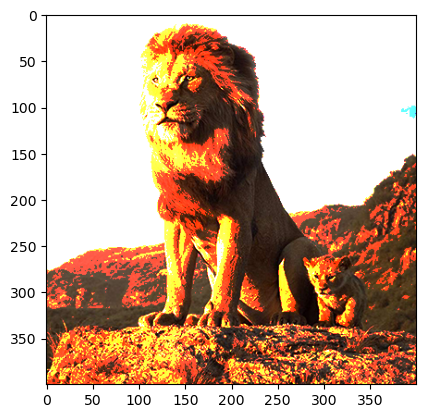

In [124]:
new_simba=thresholding_col(simba,100, max_value=255, min_value=0)
plt.imshow(cv2.cvtColor(new_simba, cv2.COLOR_BGR2RGB))
plt.show()

### Contrast & Brightness

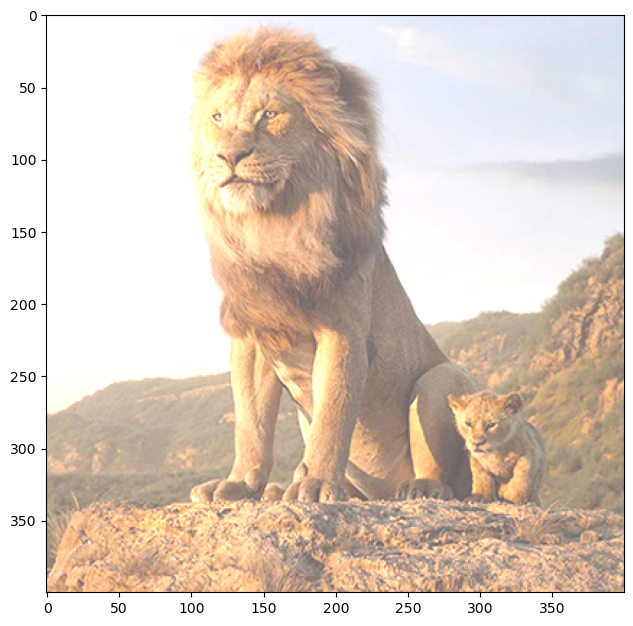

In [128]:
new_simba=cv2.convertScaleAbs(simba, alpha=1, beta=100)
plt.figure(figsize=(7.5,7.5))
plt.imshow(cv2.cvtColor(new_simba, cv2.COLOR_BGR2RGB))
plt.show()

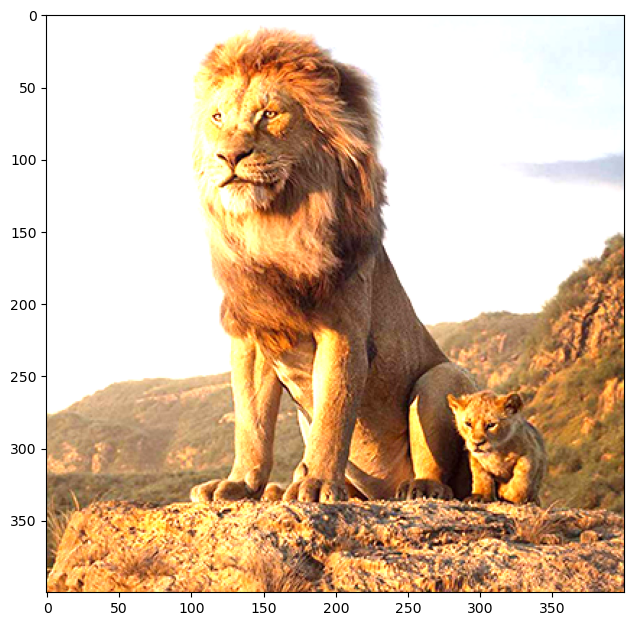

In [133]:
new_simba=cv2.convertScaleAbs(simba, alpha=2, beta=0)
plt.figure(figsize=(7.5,7.5))
plt.imshow(cv2.cvtColor(new_simba, cv2.COLOR_BGR2RGB))
plt.show()

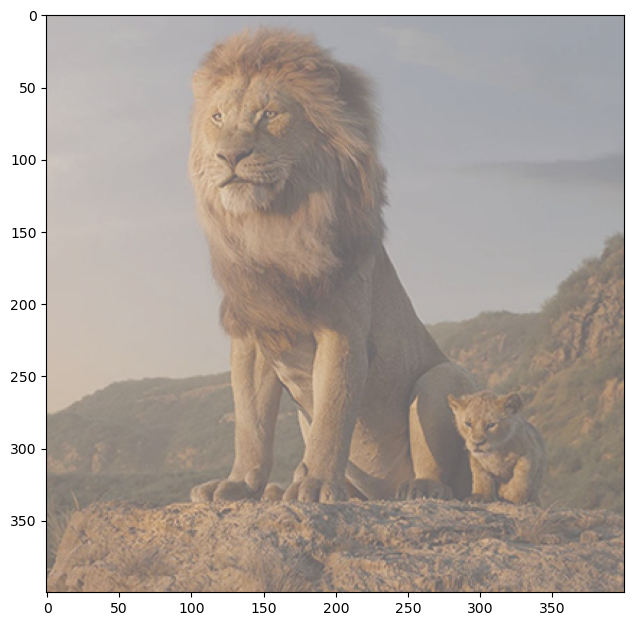

In [137]:
new_simba=cv2.convertScaleAbs(simba, alpha=0.5, beta=100)
plt.figure(figsize=(7.5,7.5))
plt.imshow(cv2.cvtColor(new_simba, cv2.COLOR_BGR2RGB))
plt.show()